# Effect Size and Multicollinearity

- Go through the input variables (all bar the target variable “G3”), assess (using effect size) which variables will best predict G3
    - Bonus: Produce a table in the following format


        |Categorical   | Numerical     |
        |--------------|---------------|
        | School: 34% | Distance from School 12% |

   - Where you put all the categorical variables into one column and assess their effect size and then all the numericals into another column

- For all numerical variables assess their multicollinearity to the target variable
- For all unique combinations of each numerical variable (eg a vs b, a vs c, b vs c) compute the VIF and comment on whether the multicollinearity is acceptable or not

## Bonus – Classification analysis with tSNE

- Use methods of data manipulation to generate “profiles” for the students, such as “hard working – good school” and “low attendance – high alcohol usage”.
- Making use of Z scores will help with this challenge
- Put this categorical variable into a tsne visual and see how well it (visually) describes your data

In [1]:
from utils.utils import setup_project_root

setup_project_root()

WindowsPath('C:/Users/zak/Projects/PycharmProjects/data-science')

In [2]:
import pandas as pd

In [9]:
student = pd.read_csv("data/student-mat.csv", sep=';')
student.info()
student

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
# Effect size on G3

## Chi-Sq -> Cramer's V
from scipy import stats
import numpy as np

student[['school', 'G3']]
school_vs_g3 = pd.crosstab(student['school'], student['G3'])

chi2, p, d, expected = stats.chi2_contingency(school_vs_g3)
expected
## calc te degrees of freedom
dof = min(school_vs_g3.shape[0]-1, school_vs_g3.shape[1]-1)

n = np.sum(school_vs_g3.values)

#compute cramer's v
cramer_v = np.sqrt((chi2/n)/dof)
print(cramer_v)
school_vs_g3


0.17188219768739246


G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
school,,,,,,,,,,,,,,,,,,
GP,34,1,5,14,7,28,24,46,43,28,26,26,30,14,6,12,4,1
MS,4,0,2,1,2,4,4,10,4,3,5,1,3,2,0,0,1,0


In [10]:
input_variables = student.drop('G3', axis=1)

categorical_variables = input_variables.select_dtypes(include=['object'])

In [15]:
cat_results = {'Categorical':{}}

for var in categorical_variables:
    var_vs_g3 = pd.crosstab(student[var], student['G3'])
    chi2, p, d, expected = stats.chi2_contingency(var_vs_g3)
    dof = min(school_vs_g3.shape[0]-1, school_vs_g3.shape[1]-1)

    n = np.sum(var_vs_g3.values)

    #compute cramer's v
    cramer_v = np.sqrt((chi2/n)/dof)
    cat_results['Categorical'][var] = cramer_v

In [16]:
cat_results

{'Categorical': {'school': np.float64(0.17188219768739246),
  'sex': np.float64(0.2255512711352024),
  'address': np.float64(0.25840667793559097),
  'famsize': np.float64(0.21031826251087135),
  'Pstatus': np.float64(0.2042923292989073),
  'Mjob': np.float64(0.48245757462014444),
  'Fjob': np.float64(0.41258009315318134),
  'reason': np.float64(0.360900327847341),
  'guardian': np.float64(0.25074760509499106),
  'schoolsup': np.float64(0.28691937287776187),
  'famsup': np.float64(0.186180008213654),
  'paid': np.float64(0.27454209793816686),
  'activities': np.float64(0.19794106060266237),
  'nursery': np.float64(0.20175414384626925),
  'higher': np.float64(0.2484430140774345),
  'internet': np.float64(0.21317023533565552),
  'romantic': np.float64(0.2763802260512859)}}

In [27]:
def eta_coef(categories, values):

    ## force inputs to be np arrays for purpose of mathematical calculations
    categories = np.array(categories)
    values = np.array(values)

    ## create bins
    effect_sizes = [0.06,0.14]

    ## label for the effect
    effect_labels = ['Small', 'Medium', 'Large']

    ss_e = 0
    ss_g = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ss_e += sum((subgroup-np.mean(subgroup))**2)
        ss_g += len(subgroup) * ((np.mean(subgroup) - np.mean(values))**2)

    effect_size = effect_labels[int(np.digitize([(ss_g/(ss_e + ss_g))], effect_sizes, right= False)[0])]

    # return effect_size, (ss_g/(ss_e + ss_g))
    return ss_g/(ss_e + ss_g)

In [28]:
eta_coef(categories=student['age'], values=student['G3'])

np.float64(0.04033285224124918)

In [29]:
numerical_variables = input_variables.select_dtypes(include=['int64'])
numerical_variables

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12


In [33]:
num_results = {'Numerical': {}}
for var in numerical_variables:
    eta_result = eta_coef(student['G3'], numerical_variables[var])
    num_results['Numerical'][var] = eta_result


In [34]:
num_results

{'Numerical': {'age': np.float64(0.05927879511549549),
  'Medu': np.float64(0.08090443312684117),
  'Fedu': np.float64(0.05607377817425827),
  'traveltime': np.float64(0.05105476340576722),
  'studytime': np.float64(0.04570774899120402),
  'failures': np.float64(0.2161527961258769),
  'famrel': np.float64(0.02628110040630615),
  'freetime': np.float64(0.03686825878616682),
  'goout': np.float64(0.06667266173951793),
  'Dalc': np.float64(0.08093195659233976),
  'Walc': np.float64(0.09972096808221949),
  'health': np.float64(0.047496348783103354),
  'absences': np.float64(0.14663040155093146),
  'G1': np.float64(0.8034940741409049),
  'G2': np.float64(0.868082316847338)}}

In [38]:
pd.DataFrame(num_results | cat_results).head(33)

,Numerical,Categorical
age,0.059279,NaN
Medu,0.080904,NaN
Fedu,0.056074,NaN
traveltime,0.051055,NaN
studytime,0.045708,NaN
failures,0.216153,NaN
famrel,0.026281,NaN
freetime,0.036868,NaN
goout,0.066673,NaN
Dalc,0.080932,NaN


## Multicollinearity



In [39]:
import seaborn as sns

<Axes: >

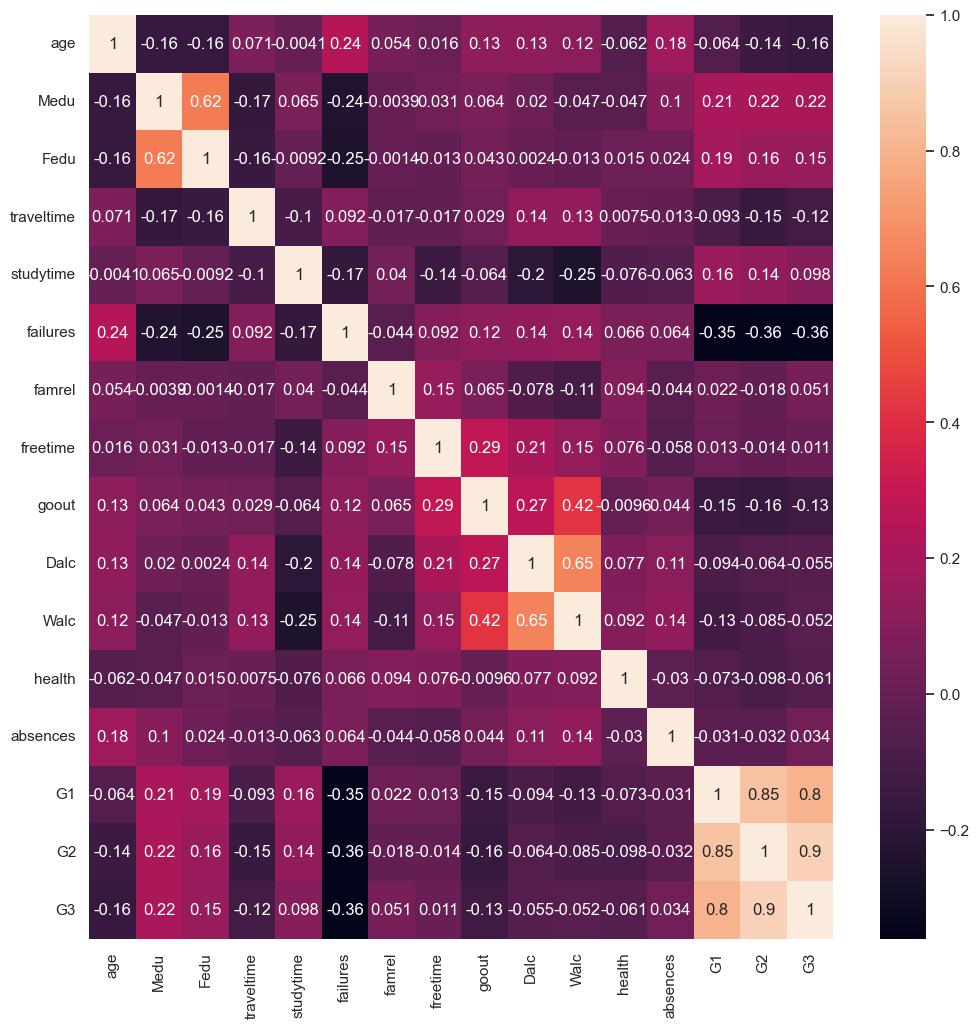

In [47]:
sns.set_theme(rc={"figure.figsize": (12, 12)})
sns.heatmap(student.select_dtypes('int64').corr(), annot=True)


In [51]:
r = 0.9
r2 = (r)**2
vif = 1/ (1-r2)
vif

5.263157894736843

In [52]:
# is VIF is less than ~ 2, Then all okay.
# VIF ~ 5 then caution to be had
# VIF >= 10 this is unacceptable

In [53]:
# Are G1 and G2 available when predicting G3? If so then I'd say feel free to use them.
# If this is a model the predict G3 at the start of the year when no exams have been taken then you can't use G1 and G2

In [54]:
student.select_dtypes('int64').corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


## Classification Analysis

Create profiles for students like 'hard working - good school' 'low attendance - high alcohol usage'

In [56]:
classification_df = student.drop(['G1', 'G2', 'G3'], axis=1)

In [64]:
def z_scoring(x, mu, sigma):
    return (x -mu) / sigma

In [66]:
from scipy.stats import zscore

In [87]:
numerical_variables.apply(zscore)[(numerical_variables.apply(zscore) >= 3) | (numerical_variables.apply(zscore) <= -3)].dropna(axis=0, how="all")

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
2,NaN,NaN,NaN,NaN,NaN,3.589323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,3.589323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,-3.287804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.955638,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,3.663251,NaN,NaN,NaN,NaN,NaN,3.955638,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,-3.287804,NaN,NaN,3.955638,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.041710,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,3.589323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.955638,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,3.663251,NaN,NaN,-3.287804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
numerical_variables.apply(zscore)[(numerical_variables.apply(zscore) >= 2) | (numerical_variables.apply(zscore) <= -2)].dropna(axis=0, how="all")

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
2,NaN,NaN,NaN,NaN,NaN,3.589323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.240828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,2.227751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,2.227751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,3.589323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,NaN,NaN,NaN,NaN,NaN,NaN,-3.287804,-2.240828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,2.592380,NaN,NaN,NaN,NaN,2.242901,NaN,NaN,NaN,2.831553,2.105989,NaN,NaN,NaN,NaN
391,NaN,NaN,NaN,NaN,NaN,NaN,-2.171138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,3.377047,NaN,NaN,NaN,NaN,3.589323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def profile(row):
    return

## Logistic Regression

Commonly used for when there are two outputs.
    Can also be used for multi-modal classification

### Transforming Data to be used by in a linear process

Categorical -> Probability -> Odds -> Logged Odds

In [108]:
prob = 0.7

def odds(p, logged=False):
    if logged:
        return np.log(p/(1-p))
    return p/(1-p)

In [109]:
odds(prob)

2.333333333333333

## Logarithms


In [110]:
input_val = 8
base = 2
base ** 3 == input_val

True

In [111]:
import math
very_large_number = math.factorial(20)
very_large_number

small_number = 14

raw_diff = very_large_number - small_number
raw_diff

2432902008176639986

In [112]:
np.log(very_large_number) - np.log(small_number)

np.float64(39.69655913113823)

In [113]:
np.log(small_number)

np.float64(2.6390573296152584)

## Logged Odds of the event

In [121]:
probability = 0.5
odds_of_event = odds(probability)
odds_of_event

1.0

In [122]:
ln_odds = odds(probability, logged=True)
ln_odds
# unit of logits

np.float64(0.0)

### Benefits of using logged odds

1. If the probability of the event is >0.5 then the logged odds will be a positive number.
2. If the probability of the event is <0.5 then the logged odds will be a negative number.

fit is the model learning.